In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_ann_file = 'train_annotation.csv'
val_ann_file = 'val_annotation.csv'
data = pd.read_csv(train_ann_file)

# Display the first few rows of the dataframe to understand its structure
print(data.head())

# Check for any missing values in the data
print(data.isnull().sum())
# Mapping dictionary for emotions
emotion_mapping = {
    0: 'Neutral',
    1: 'Happy',
    2: 'Sad',
    3: 'Surprise',
    4: 'Fear',
    5: 'Disgust',
    6: 'Anger',
    7: 'Contempt'
}

# Replace numerical values with emotion names in the Expression column
data['Expression'] = data['Expression'].map(emotion_mapping)

   Unnamed: 0  filename   Arousal   Valance  Expression
0           0    122745 -0.304233 -0.535714           2
1           1    130324  0.775376  0.250627           3
2           2    236766  0.015312  0.627775           1
3           3    289965 -0.150794  0.714286           1
4           4    148012  0.314872 -0.116460           6
Unnamed: 0    0
filename      0
Arousal       0
Valance       0
Expression    0
dtype: int64


In [53]:
pal = sns.color_palette("bright")
pal.as_hex()[0]

'#023eff'

In [54]:
emotion_palette = {
    'Happy': '#1ac938', 
    'Sad': '#023eff',    
    'Anger': '#e8000b',  
    'Surprise': '#ffc400',  
    'Disgust': '#9f4800',  
    'Fear': '#8b2be2',  
    'Neutral': '#a3a3a3',    
    'Contempt': '#f14cc1'   
}

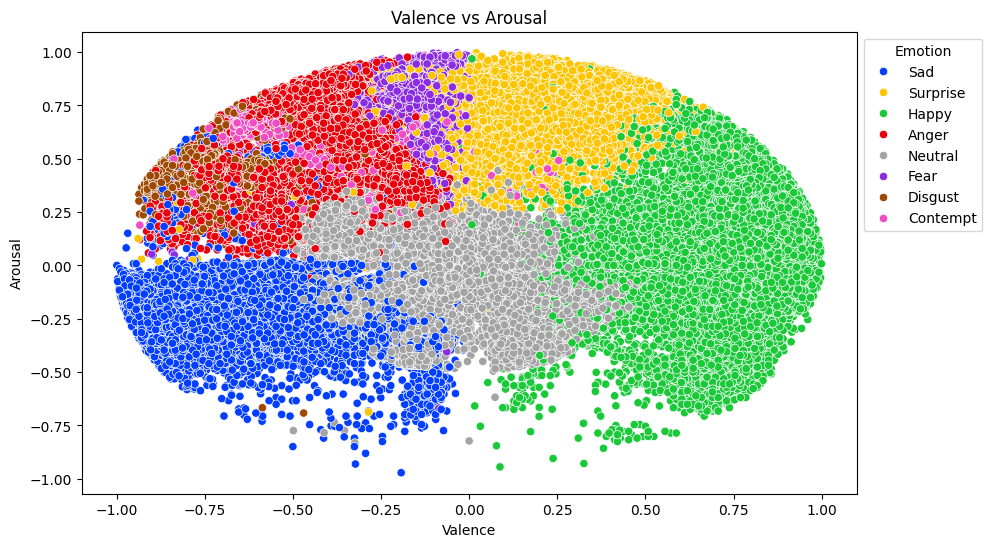

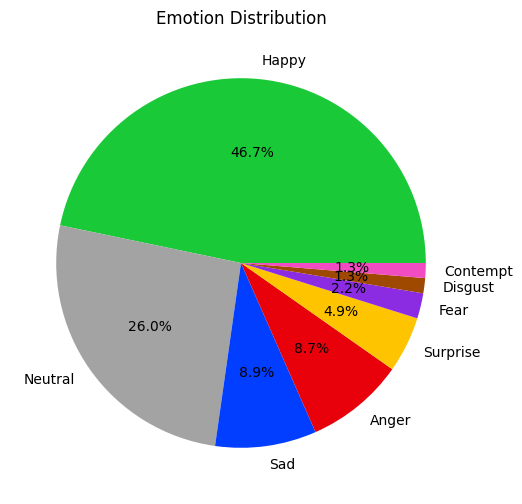

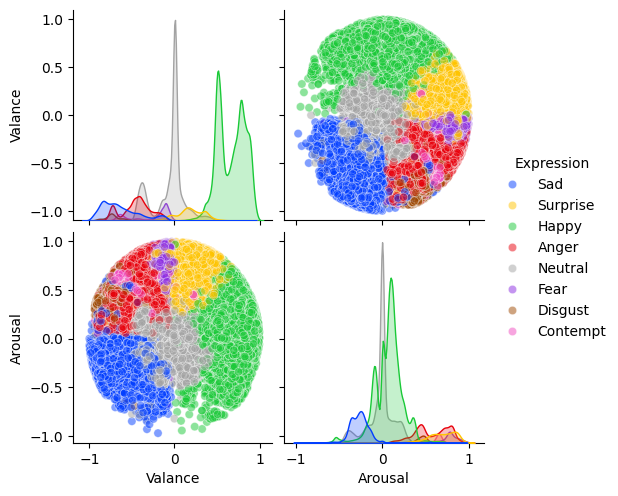

In [56]:
# Scatter plot for valence vs arousal
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valance', y='Arousal', hue='Expression', data=data, palette=emotion_palette)
plt.title('Valence vs Arousal')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.legend(title='Emotion', bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Valence_arousal_trainSet.pdf', bbox_inches='tight')
plt.show()


# Pie chart for emotion distribution
emotion_counts = data['Expression'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', colors=[emotion_palette[key] for key in emotion_counts.index])
plt.title('Emotion Distribution')
plt.savefig('emotion_distribution_trainSet.pdf', bbox_inches='tight')
plt.show()


# Pair plot for valence and arousal with hue as emotion
sns.pairplot(data, vars=['Valance', 'Arousal'], hue='Expression', palette=emotion_palette, plot_kws={'alpha':0.5})
plt.savefig('pairwise_trainSet.pdf', bbox_inches='tight')
plt.show()


   Unnamed: 0  filename   Arousal   Valance  Expression
0           0    122745 -0.304233 -0.535714           2
1           1    130324  0.775376  0.250627           3
2           2    236766  0.015312  0.627775           1
3           3    289965 -0.150794  0.714286           1
4           4    148012  0.314872 -0.116460           6
   Unnamed: 0  filename   Arousal   Valance  Expression
0           0      2864  0.793651 -0.150794           4
1           1       747  0.585559 -0.338753           6
2           2      2085 -0.285714 -0.476190           2
3           3      2874  0.793651  0.038715           7
4           4      2095  0.527994  0.473202           3
Unnamed: 0    0
filename      0
Arousal       0
Valance       0
Expression    0
dtype: int64
Unnamed: 0    0
filename      0
Arousal       0
Valance       0
Expression    0
dtype: int64


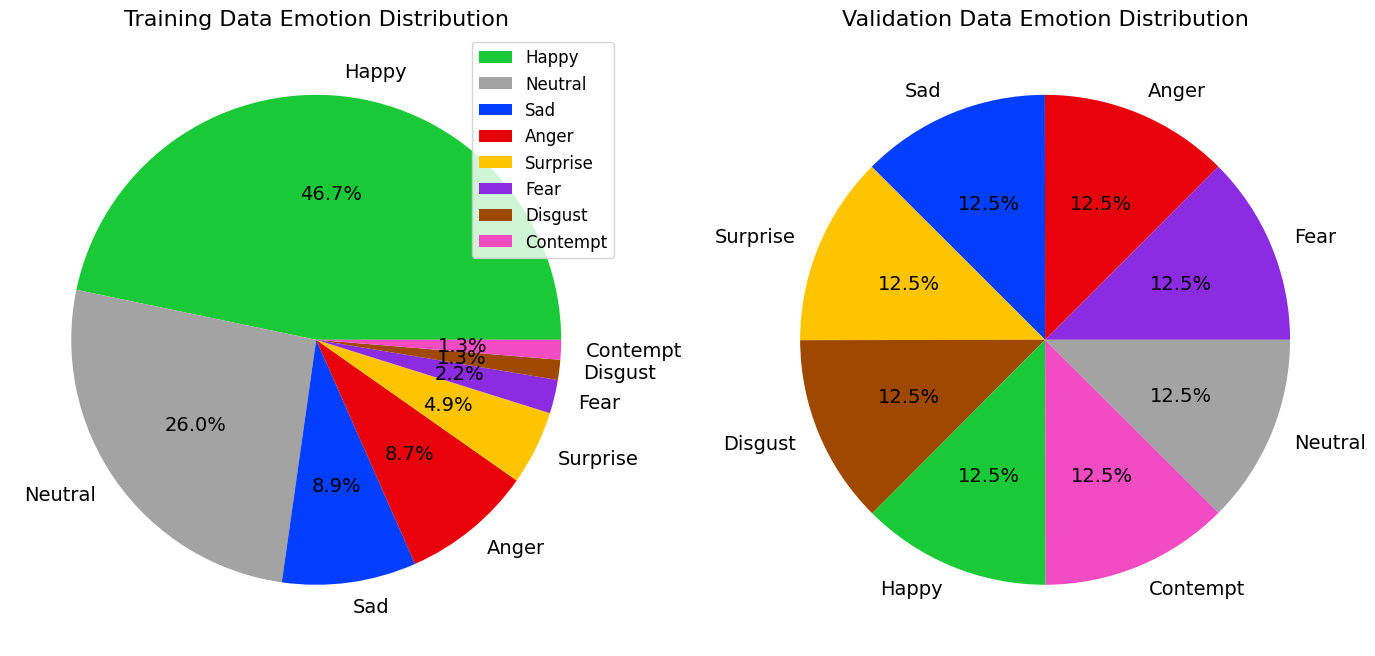

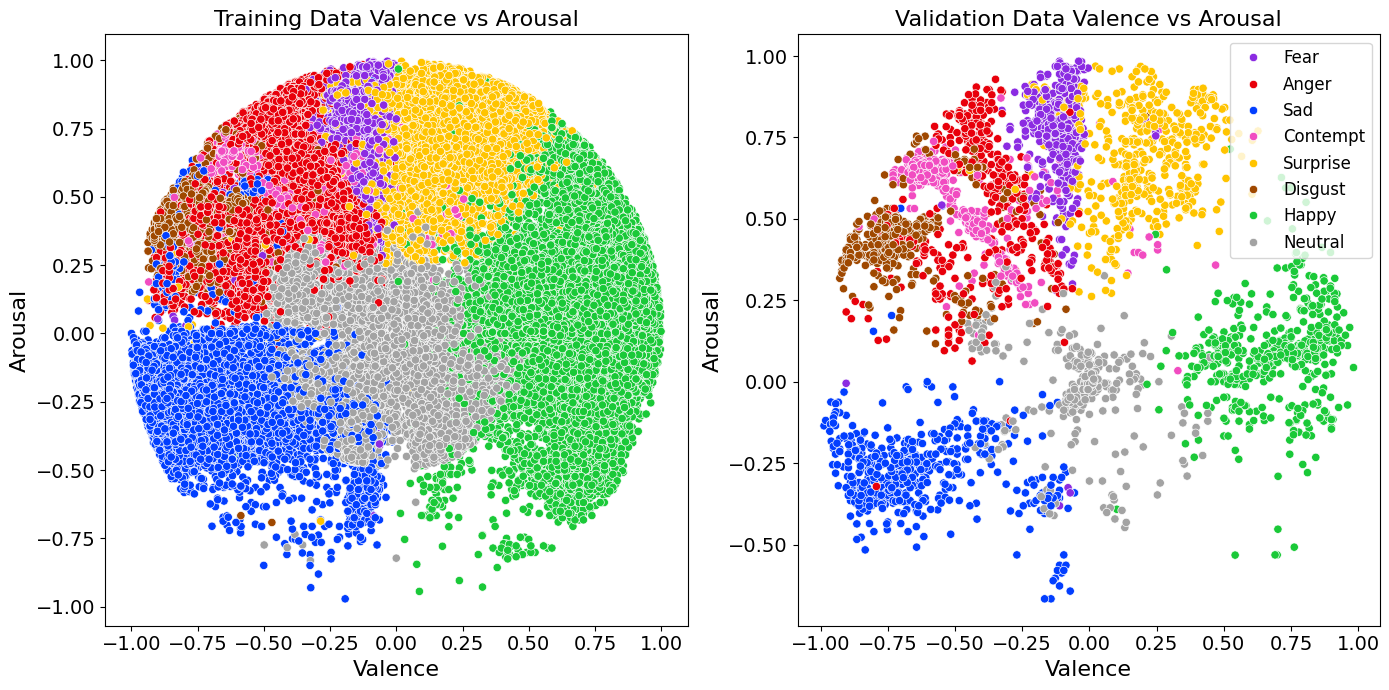

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV files
train_file_path = 'train_annotation.csv'  # replace with your training CSV file path
val_file_path = 'val_annotation.csv'  # replace with your validation CSV file path
train_data = pd.read_csv(train_file_path)
val_data = pd.read_csv(val_file_path)

# Display the first few rows of the dataframes to understand their structure
print(train_data.head())
print(val_data.head())

# Check for any missing values in the data
print(train_data.isnull().sum())
print(val_data.isnull().sum())

# Mapping dictionary for emotions
emotion_mapping = {
    0: 'Neutral',
    1: 'Happy',
    2: 'Sad',
    3: 'Surprise',
    4: 'Fear',
    5: 'Disgust',
    6: 'Anger',
    7: 'Contempt'
}

# Replace numerical values with emotion names in the Expression column
train_data['Expression'] = train_data['Expression'].map(emotion_mapping)
val_data['Expression'] = val_data['Expression'].map(emotion_mapping)

emotion_palette = {
    'Happy': '#1ac938', 
    'Sad': '#023eff',    
    'Anger': '#e8000b',  
    'Surprise': '#ffc400',  
    'Disgust': '#9f4800',  
    'Fear': '#8b2be2',  
    'Neutral': '#a3a3a3',    
    'Contempt': '#f14cc1'   
}

# Define the directory to save the plots
output_dir = 'plots'

# Create the directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Helper function to plot pie charts
def plot_pie_charts(train_data, val_data, save_path):
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    
    # Pie chart for training data
    train_emotion_counts = train_data['Expression'].value_counts()
    axes[0].pie(train_emotion_counts, labels=train_emotion_counts.index, autopct='%1.1f%%', colors=[emotion_palette[key] for key in train_emotion_counts.index], textprops={'fontsize': 14})
    axes[0].set_title('Training Data Emotion Distribution', fontsize=16)
    axes[0].legend(loc='upper right', fontsize=12)

    # Pie chart for validation data
    val_emotion_counts = val_data['Expression'].value_counts()
    axes[1].pie(val_emotion_counts, labels=val_emotion_counts.index, autopct='%1.1f%%', colors=[emotion_palette[key] for key in val_emotion_counts.index], textprops={'fontsize': 14})
    axes[1].set_title('Validation Data Emotion Distribution', fontsize=16)

    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

# Helper function to plot valence-arousal scatter plots
def plot_valence_arousal(train_data, val_data, save_path):
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    
    # Scatter plot for training data
    sns.scatterplot(x='Valance', y='Arousal', hue='Expression', data=train_data, palette=emotion_palette, ax=axes[0])
    axes[0].set_title('Training Data Valence vs Arousal', fontsize=16)
    axes[0].legend().remove()
    axes[0].tick_params(axis='both', which='major', labelsize=14)
    axes[0].tick_params(axis='both', which='minor', labelsize=14)
    axes[0].set_xlabel('Valence', fontsize=16)
    axes[0].set_ylabel('Arousal', fontsize=16)

    # Scatter plot for validation data
    sns.scatterplot(x='Valance', y='Arousal', hue='Expression', data=val_data, palette=emotion_palette, ax=axes[1])
    axes[1].set_title('Validation Data Valence vs Arousal', fontsize=16)
    axes[1].legend(loc='upper right', fontsize=12)
    axes[1].tick_params(axis='both', which='major', labelsize=14)
    axes[1].tick_params(axis='both', which='minor', labelsize=14)
    axes[1].set_xlabel('Valence', fontsize=16)
    axes[1].set_ylabel('Arousal', fontsize=16)

    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()


# Plot pie charts for training and validation data
plot_pie_charts(train_data, val_data, os.path.join(output_dir, 'emotion_dist_val_train.pdf'))

# Plot valence-arousal scatter plots for training and validation data
plot_valence_arousal(train_data, val_data, os.path.join(output_dir, 'valence_arousal_scatter_val_train.png'))


In [4]:
train_data['Expression'].value_counts()

Happy       134415
Neutral      74874
Sad          25459
Anger        24882
Surprise     14090
Fear          6378
Disgust       3803
Contempt      3750
Name: Expression, dtype: int64

In [5]:
14090*5

70450

Training the data

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import pandas as pd
import os

# Directory and file paths
train_dir = 'train_set/images'
val_dir = 'val_set/images'
train_ann_file = 'train_annotation.csv'
val_ann_file = 'val_annotation.csv'

# Parameters
input_shape = (227, 227, 3)
batch_size = 20
num_emotions = 8

# Function to one-hot encode emotion labels
def one_hot_encode(number, num_classes=num_emotions):
    one_hot_vector = np.zeros(num_classes)
    one_hot_vector[number] = 1
    return one_hot_vector

# Function to generate augmented data for minority class images
def data_generator(dir_path, ann_file, batch_size, input_shape, augment=False):
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    minority_classes=[4,5,7]
    anno = pd.read_csv(ann_file)
    while True:
        batch_paths = np.random.choice(anno['filename'], size=batch_size)
        batch_input, batch_output_valence, batch_output_arousal, batch_output_emotion = [], [], [], []

        for input_path in batch_paths:
            img_path = os.path.join(dir_path, str(input_path)+'.jpg')
            img = load_img(img_path, target_size=input_shape)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Reshape to add batch dimension
            
            row = anno[anno["filename"] == input_path]
            if row.empty:
                print(f"Warning: No annotation found for {input_path}")
                continue
            
            # Check if the image belongs to a minority class
            emotion_class = row["Expression"].values[0]
            if augment and emotion_class in minority_classes:
                # Apply data augmentation
                for _ in range(5):  # Generate 5 augmented images
                    augmented_img = next(datagen.flow(img_array, batch_size=1))[0]
                    batch_input.append(augmented_img)  # Remove batch dimension
                    batch_output_valence.append(row["Valance"].values[0])
                    batch_output_arousal.append(row["Arousal"].values[0])
                    batch_output_emotion.append(one_hot_encode(row["Expression"].values[0]))
                    
            else:
                # No augmentation for majority classes
                batch_input.append(img_array[0])
                batch_output_valence.append(row["Valance"].values[0])
                batch_output_arousal.append(row["Arousal"].values[0])
                batch_output_emotion.append(one_hot_encode(row["Expression"].values[0]))

        batch_input = np.array(batch_input)
        batch_output_valence = np.array(batch_output_valence)
        batch_output_arousal = np.array(batch_output_arousal)
        batch_output_emotion = np.array(batch_output_emotion)

        yield batch_input, {"valence": batch_output_valence, "arousal": batch_output_arousal, "emotion": batch_output_emotion}

# Model definition
input_layer = Input(shape=input_shape)
x = Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
x = Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
x = Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
x = Flatten()(x)
x = Dense(9216, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)

# Valence task-specific layers
dense_valence = Dense(64, activation='relu')(x)
output_valence = Dense(1, activation='sigmoid', name='valence')(dense_valence)

# Arousal task-specific layers
dense_arousal = Dense(64, activation='relu')(x)
output_arousal = Dense(1, activation='sigmoid', name='arousal')(dense_arousal)

# Emotion task-specific layers
dense_emotion = Dense(64, activation='relu')(x)
output_emotion = Dense(num_emotions, activation='softmax', name='emotion')(dense_emotion)

# Compile the model
model = Model(inputs=input_layer, outputs=[output_valence, output_arousal, output_emotion])
model.compile(optimizer=Adam(),
              loss={'valence': 'mse', 'arousal': 'mse', 'emotion': 'categorical_crossentropy'},
              metrics={'valence': ['mae'], 'arousal': ['mae'], 'emotion': ['accuracy']})

# Print model summary
model.summary()

# Training and validation data generators
train_gen = data_generator(train_dir, train_ann_file, batch_size, input_shape, augment=True)
val_gen = data_generator(val_dir, val_ann_file, batch_size, input_shape, augment=False)

# Training parameters
epoch_steps = 30000 // batch_size
val_steps = 300

# Callbacks
callbacks = [
    EarlyStopping(monitor='valence_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='valence_loss'),
    ReduceLROnPlateau(monitor='valence_loss', factor=0.2, patience=5, min_lr=1e-6)
]

# Train the model
history = model.fit(train_gen, steps_per_epoch=30, epochs=10, callbacks=callbacks)

# Collect true labels and predictions
y_true_valence, y_pred_valence = [], []
y_true_arousal, y_pred_arousal = [], []
y_true_emotion, y_pred_emotion = [], []

resultall = model.evaluate(val_gen, steps=val_steps)
for _ in range(val_steps):
    x_val, y_val = next(val_gen)
    y_pred = model.predict(x_val)
    
    y_true_valence.extend(y_val['valence'])
    y_pred_valence.extend(y_pred[0].squeeze())  # Squeeze to match shape
    y_true_arousal.extend(y_val['arousal'])
    y_pred_arousal.extend(y_pred[1].squeeze())  # Squeeze to match shape
    y_true_emotion.extend(y_val['emotion'])
    y_pred_emotion.extend(y_pred[2])

# Convert lists to arrays
y_true_valence = np.array(y_true_valence)
y_pred_valence = np.array(y_pred_valence)
y_true_arousal = np.array(y_true_arousal)
y_pred_arousal = np.array(y_pred_arousal)
y_true_emotion = np.argmax(np.array(y_true_emotion), axis=1)
y_pred_emotion = np.argmax(np.array(y_pred_emotion), axis=1)

# Calculate Precision, Recall, and F1-Score for emotion
true_positives = np.sum((y_pred_emotion == y_true_emotion) & (y_true_emotion == 1))
predicted_positives = np.sum(y_pred_emotion == 1)
actual_positives = np.sum(y_true_emotion == 1)

precision = true_positives / predicted_positives if predicted_positives > 0 else 0
recall = true_positives / actual_positives if actual_positives > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall + np.finfo(float).eps)

# Define CCC function
def ccc(y_true, y_pred):
    y_true_mean = np.mean(y_true)
    y_pred_mean = np.mean(y_pred)
    covariance = np.mean((y_true - y_true_mean) * (y_pred - y_pred_mean))
    true_var = np.mean((y_true - y_true_mean) ** 2)
    pred_var = np.mean((y_pred - y_pred_mean) ** 2)
    ccc_value = 2 * covariance / (true_var + pred_var + (y_true_mean - y_pred_mean) ** 2)
    return ccc_value

# Calculate CCC for valence and arousal
ccc_valence = ccc(y_true_valence, y_pred_valence)
ccc_arousal = ccc(y_true_arousal, y_pred_arousal)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"CCC for Valence: {ccc_valence:.4f}")
print(f"CCC for Arousal: {ccc_arousal:.4f}")

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 55, 55, 96)   34944       input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 27, 27, 96)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 27, 27, 256)  614656      max_pooling2d[0][0]              
______________________________________________________________________________________________

In [15]:
from numba import cuda

device = cuda.get_current_device()
device.reset()


In [2]:
y_pred[2]

array([[0.00804851, 0.00933513, 0.32137212, 0.16774799, 0.09336414,
        0.08109447, 0.26900336, 0.05003421],
       [0.00804851, 0.00933513, 0.32137212, 0.16774799, 0.09336414,
        0.08109447, 0.26900336, 0.05003421],
       [0.00803758, 0.00932051, 0.3214107 , 0.16782352, 0.09332242,
        0.08106486, 0.26901844, 0.05000194],
       [0.00801945, 0.00916689, 0.32138693, 0.16802898, 0.09321371,
        0.08072337, 0.2695787 , 0.04988197],
       [0.00803934, 0.0093207 , 0.32145536, 0.16786677, 0.09331364,
        0.081039  , 0.26900417, 0.04996095],
       [0.00800649, 0.00924595, 0.32144985, 0.16790736, 0.09331807,
        0.08095159, 0.26926282, 0.04985789],
       [0.01034213, 0.01173816, 0.30663726, 0.16912621, 0.09856929,
        0.08596707, 0.2619461 , 0.05567373],
       [0.00762859, 0.00878375, 0.3236977 , 0.16780558, 0.09226908,
        0.07985337, 0.2711257 , 0.04883626],
       [0.00812585, 0.00942374, 0.32088333, 0.16785282, 0.09353705,
        0.08130137, 0.268623

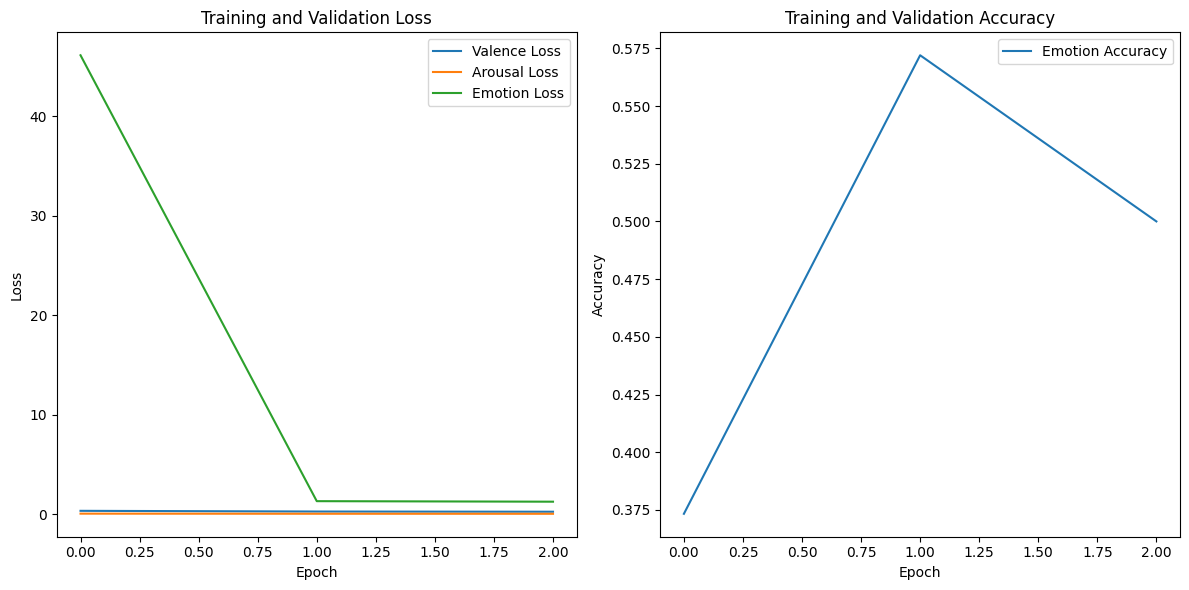

In [2]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['valence_loss'], label='Valence Loss')
plt.plot(history.history['arousal_loss'], label='Arousal Loss')
plt.plot(history.history['emotion_loss'], label='Emotion Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
# plt.plot(history.history['valence_accuracy'], label='Valence Accuracy')
# plt.plot(history.history['arousal_accuracy'], label='Arousal Accuracy')
plt.plot(history.history['emotion_accuracy'], label='Emotion Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

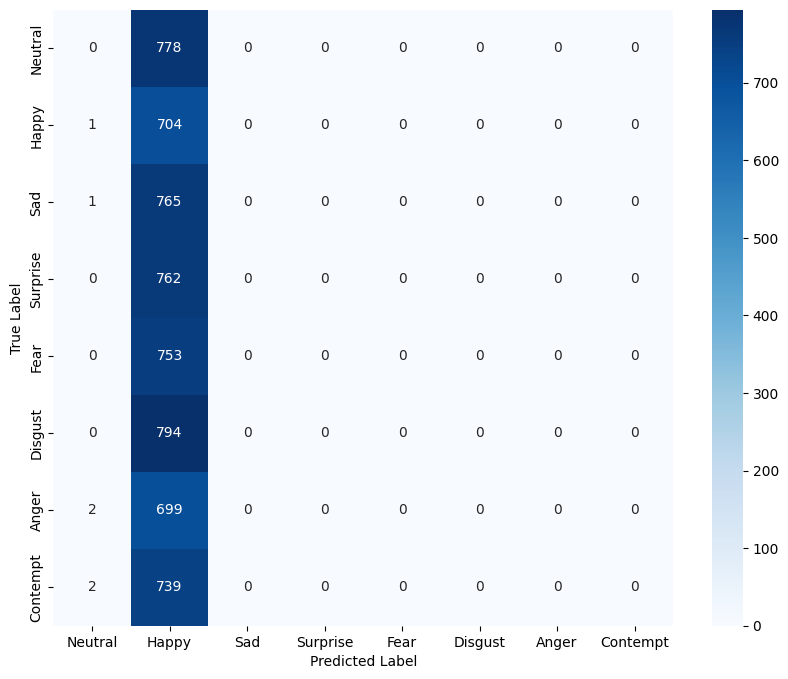

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
emotion_mapping = {
    0: 'Neutral',
    1: 'Happy',
    2: 'Sad',
    3: 'Surprise',
    4: 'Fear',
    5: 'Disgust',
    6: 'Anger',
    7: 'Contempt'
}
# Plot confusion matrix for emotion prediction with mapped labels
emotion_labels_mapped = [emotion_mapping[i] for i in range(num_emotions)]
cm_emotion_mapped = confusion_matrix(y_true_emotion, y_pred_emotion)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_emotion_mapped, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels_mapped, yticklabels=emotion_labels_mapped)
# plt.title('Emotion Prediction Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [5]:
history.history['emotion_accuracy']

[0.2625698447227478,
 0.2792207896709442,
 0.299401193857193,
 0.27544909715652466,
 0.2716049253940582]

In [4]:
y_true_emotion

array([0, 6, 3, ..., 0, 3, 2], dtype=int64)

In [5]:
print(y_pred_emotion)

[1 1 1 ... 1 1 1]
